In [591]:
def init_model():
    # model
    model = NN(1, 1)

    # Loss 
    loss = nn.MSELoss()
    
    return model, loss

In [893]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
k = 1
n_class = 1
max_epoch = 100
learning_rate = 0.01

X_train = torch.tensor([[1],[2],[3],[4],[5]], dtype=torch.float32)
y_train = torch.tensor([[2],[4],[6],[8],[10]], dtype=torch.float32)

In [1266]:
class NN(nn.Module):
    def __init__(self, k, n_class):
        super(NN, self).__init__()
        self.l1 = nn.Linear(k, n_class)
        
        self.act = torch.nn.functional.silu
    def forward(self, X):
        return self.act(self.l1(X))
    
model, loss = init_model()

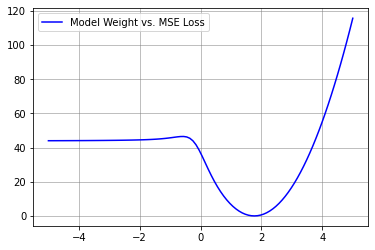

<Figure size 432x288 with 0 Axes>

In [1268]:
model, loss = init_model()

import matplotlib.pyplot as plt

# 100 linearly spaced numbers
W_guesses = torch.linspace(-5,5,100)

# loss
l = []
for i in range(len(W_guesses)):
    model.l1.weight.data = torch.tensor([[W_guesses[i]]])
    l.append(loss(model(X_train), y_train))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.grid(color='gray', linestyle='-', linewidth=0.5)

# plot the functions
plt.plot(W_guesses,l, 'b', label='Model Weight vs. MSE Loss')

plt.legend(loc='upper left')

# show the plot
plt.savefig("swish_loss.png", dpi=100)
plt.show()
plt.draw()



In [1152]:
def mesh_grid_loss(act, X, W1_guess, W2_guess):
    if act == "swish": 
        act = torch.nn.functional.silu
    else: act = torch.nn.functional.relu
    print(W1_guess.shape)
    a1 = act(X.matmul(W1_guess))
    a2 = act(a1.matmul(W2_guess))
    
    return a2

In [1153]:
model, loss = init_model()

import matplotlib.pyplot as plt

# 100 linearly spaced numbers

N = 100

W1_guesses = torch.linspace(-1000,1000,N)
W2_guesses = torch.linspace(-1000,1000,N)



# loss
l = torch.empty(N, N)
for i in range(N):
    model.l1.weight.data = torch.tensor([[W1_guesses[i]]])
    for j in range (N):
        model.l2.weight.data = torch.tensor([[W2_guesses[i]]])
        l[i][j] = loss(model(X_train), y_train)
        

/Users/marcmelikyan/Desktop/Deep-Learning/dl_env/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [850]:
optimal_parameters = X_train.T.matmul(X_train).inverse().matmul(X_train.T.matmul(y_train))

In [905]:
model, loss = init_model()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(max_epoch):

    l = loss(model(X_train.to(device)), y_train.to(device))


    print("Epoch " + str(epoch+1))
    print("Model Weight: " + str(model.l1.weight.item()))
    print("Loss: " + str(l.item()))
    print('\n')

    l.backward()
    
    optimizer.step()
    optimizer.zero_grad()

Epoch 1
Model Weight: -0.10700535774230957
Loss: 37.409114837646484


Epoch 2
Model Weight: -0.10700535774230957
Loss: 36.24451446533203


Epoch 3
Model Weight: -0.10700535774230957
Loss: 35.12602996826172


Epoch 4
Model Weight: -0.10700535774230957
Loss: 34.051841735839844


Epoch 5
Model Weight: -0.10700535774230957
Loss: 33.02018737792969


Epoch 6
Model Weight: -0.10700535774230957
Loss: 32.02938461303711


Epoch 7
Model Weight: -0.10700535774230957
Loss: 31.077823638916016


Epoch 8
Model Weight: -0.10700535774230957
Loss: 30.163944244384766


Epoch 9
Model Weight: -0.10700535774230957
Loss: 29.2862491607666


Epoch 10
Model Weight: -0.10700535774230957
Loss: 28.443313598632812


Epoch 11
Model Weight: -0.10700535774230957
Loss: 27.633758544921875


Epoch 12
Model Weight: -0.10700535774230957
Loss: 26.85626220703125


Epoch 13
Model Weight: -0.10700535774230957
Loss: 26.109554290771484


Epoch 14
Model Weight: -0.10700535774230957
Loss: 25.392417907714844


Epoch 15
Model Weight:

In [1258]:
relu_exp = []
EXP_NUM = 100
for i in range(EXP_NUM):

    #relu 
    COMP_NUM = 100
    unoptimal_min = 0
    for i in range(COMP_NUM):
        model, loss = init_model()
        # training
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        # Training loop
        l = None
        for epoch in range(max_epoch):

            l = loss(model(X_train.to(device)), y_train.to(device))


    #         print("Epoch " + str(epoch+1))
    #         print("Model Weight: " + str(model.l1.weight.item()))
    #         print("Loss: " + str(l.item()))
    #         print('\n')

            l.backward()
            optimizer.step()
            optimizer.zero_grad()

        y_hat = torch.round(model(X_train.to(device)))
        if(torch.eq(y_hat, y_train).sum() == len(y_hat)): unoptimal_min+=1

    percent_optimal_min = unoptimal_min / EXP_NUM * 100
    relu_exp.append(percent_optimal_min)
    print(percent_optimal_min)



10.0
9.0
7.000000000000001
9.0
4.0
11.0
9.0
11.0
10.0
10.0
5.0
6.0
14.000000000000002
9.0
10.0
8.0
11.0
9.0
12.0
9.0
7.000000000000001
9.0
6.0
9.0
13.0
11.0
11.0
12.0
10.0
8.0
8.0
9.0
11.0
7.000000000000001
11.0
12.0
7.000000000000001
9.0
9.0
7.000000000000001
8.0
11.0
7.000000000000001
7.000000000000001
8.0
6.0
9.0
6.0
7.000000000000001
14.000000000000002
5.0
6.0
6.0
5.0
6.0
7.000000000000001
8.0
8.0
6.0
5.0
12.0
12.0
7.000000000000001
8.0
9.0
5.0
10.0
7.000000000000001
15.0
17.0
6.0
10.0
6.0
10.0
11.0
6.0
10.0
5.0
8.0
8.0
5.0
14.000000000000002
10.0
8.0
10.0
9.0
7.000000000000001
8.0
13.0
7.000000000000001
9.0
9.0
10.0
11.0
8.0
10.0
9.0
7.000000000000001
8.0
8.0


In [1259]:
import numpy as np
silu_exp = np.array(silu_exp)

In [1203]:
silu_std = silu_exp.std()
silu_mean = silu_exp.mean()

print(str(silu_mean) + " +/- " + str(silu_std))

41.02 +/- 4.651838346288487


In [1260]:
import numpy as np
relu_exp = np.array(relu_exp)

relu_std = relu_exp.std()
relu_mean = relu_exp.mean()

print(str(relu_mean) + " +/- " + str(relu_std))

8.76 +/- 2.4621941434419825
